# Contour detection

In [1]:
import tensorflow as tf
from keras import backend as K
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

import keras

from keras.utils import np_utils
from keras.optimizers import Adam

import os
import numpy as np
import itertools

import cv2
import os
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


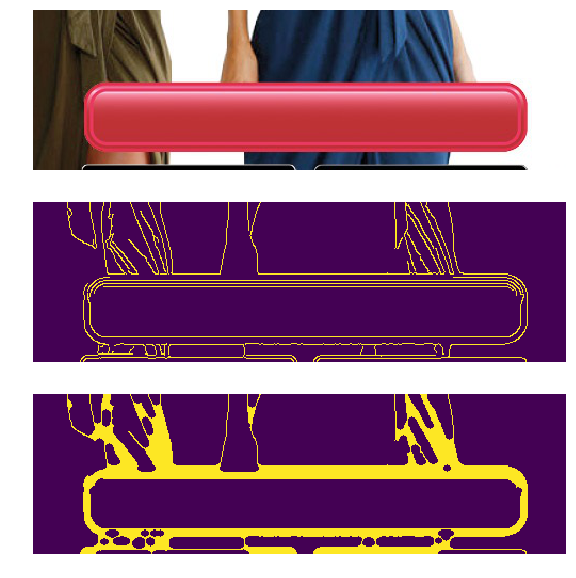

In [2]:
def get_edge_map(img, debugDraw = False):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    if debugDraw:
        plt.figure(figsize=(20, 10))
        plt.subplot(3, 1, 1)
        plt.axis("off")
        plt.imshow(button_img)

    img_gray = cv2.blur(img_gray, (3, 3))
    edges = cv2.Canny(img_gray, 3, 220)[:, :, np.newaxis] / 255.0
    if debugDraw:
        plt.subplot(3, 1, 2)
        plt.axis("off")
        plt.imshow(edges[:, :, 0])

    edges = cv2.dilate(edges, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
    edges = cv2.erode(edges, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
    if debugDraw:
        plt.subplot(3, 1, 3)
        plt.axis("off")
        plt.imshow(edges[:, :] > 0)
    
    return edges

img_f = image.load_img("sample_creative2.jpg")
button_img = np.array(img_f)[400:550, 700:1200, :]
_ = get_edge_map(button_img, True)

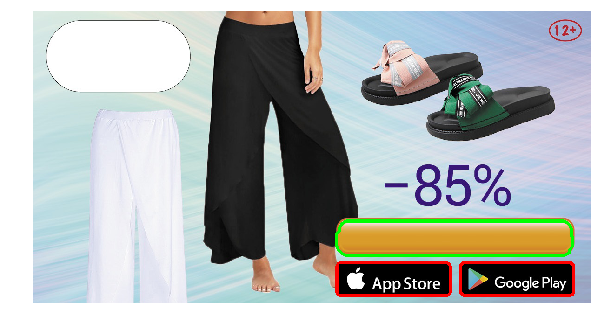

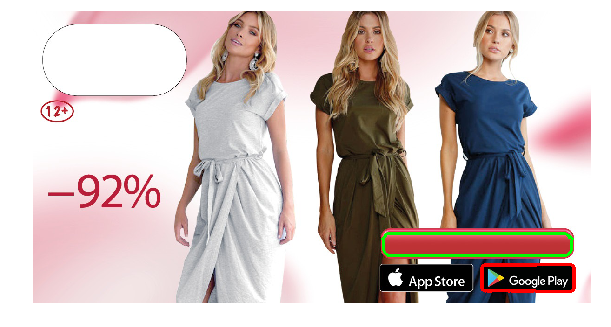

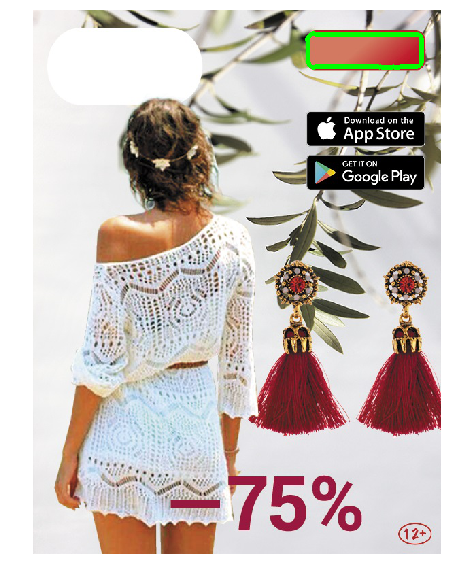

In [3]:
from collections import Counter

def get_button_contour(edges, debugDraw = False):
    im2, contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shapes = Counter()

    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        (x, y, w, h) = cv2.boundingRect(cnt)

        if (w * h * 0.9 < area) & (area > 100):
            shapes[i] = area
            if debugDraw:
                cv2.drawContours(img_f, [cnt], -1, (255, 0, 0), 5)
    if debugDraw:
        cv2.drawContours(img_f, [contours[shapes.most_common(1)[0][0]]], -1, (0, 255, 0), 5)
        plt.imshow(img_f)
    return contours[shapes.most_common(1)[0][0]]

for i, img in enumerate(["sample_creative1.jpg", "sample_creative2.jpg", "sample_creative3.jpg"]):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    img_f = np.array(image.load_img(img))
    edges = get_edge_map(img_f)
    get_button_contour(edges, True)